# Load Libraries

In [1]:
import numpy as np

from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.layers import (BatchNormalization)
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from IPython.display import SVG
from keras.regularizers import l2, l1, l1_l2
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

np.random.seed(1234)

# Load dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
# reshaping x_train and x_test
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train_cnn.shape)
print(x_test_cnn.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [ ]:
print(y_train_cnn.shape)
print(y_test_cnn.shape)


(60000, 10)
(10000, 10)


## Data Normalization

In [ ]:
# normalize train and test to [0, 1]
x_train_norm, x_test_norm = x_train_cnn/255.0, x_test_cnn/255.0;

# CNN with softmax

## Baseline

In [2]:
# Model
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1.add(Flatten())
cnn1.add(Dense(1024, activation='relu'))

cnn1.add(Dropout(rate=0.5))

cnn1.add(Dense(10, activation='softmax'))

In [3]:
opt = Adam(lr= 1e-3, beta_1=0.9, beta_2=0.999)

In [4]:
cnn1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 1024)              2

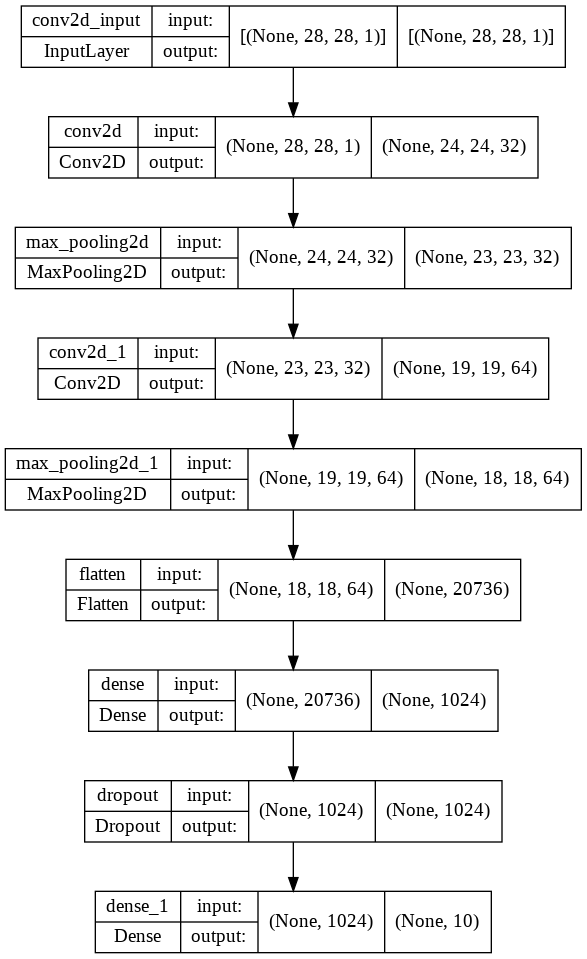

In [5]:
cnn1.summary()
# model shape
tf.keras.utils.plot_model(cnn1, show_shapes=True)

In [ ]:
history = cnn1.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 28s 33ms/step - loss: 0.6449 - accuracy: 0.8176 - val_loss: 0.3600 - val_accuracy: 0.8680
Epoch 2/25
469/469 [==============================] - 16s 33ms/step - loss: 0.3497 - accuracy: 0.8714 - val_loss: 0.3265 - val_accuracy: 0.8789
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.3025 - accuracy: 0.8885 - val_loss: 0.3050 - val_accuracy: 0.8863
Epoch 4/25
469/469 [==============================] - 16s 33ms/step - loss: 0.2671 - accuracy: 0.9002 - val_loss: 0.2913 - val_accuracy: 0.8973
Epoch 5/25
469/469 [==============================] - 15s 33ms/step - loss: 0.2409 - accuracy: 0.9098 - val_loss: 0.2861 - val_accuracy: 0.8983
Epoch 6/25
469/469 [==============================] - 16s 33ms/step - loss: 0.2174 - accuracy: 0.9173 - val_loss: 0.2807 - val_accuracy: 0.9007
Epoch 7/25
469/469 [==============================] - 15s 33ms/step - loss: 0.1983 - accuracy: 0.9251 - val_loss: 0.2646 - val_accuracy:

In [ ]:
score = cnn1.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45504510402679443
Test accuracy: 0.9150000214576721


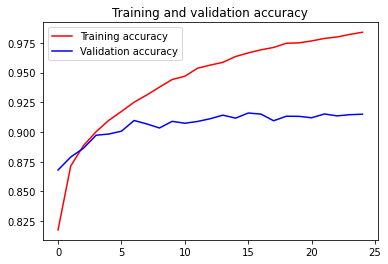

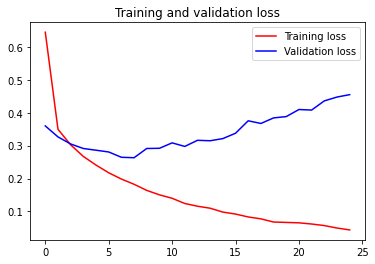

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


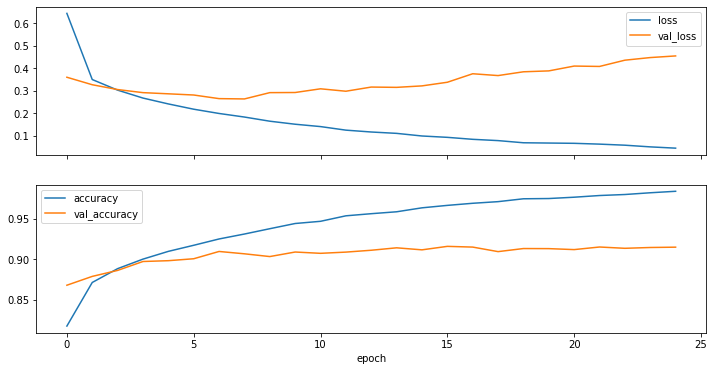

In [ ]:
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y =["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax= ax1);


# CNN with SVM

## Baseline

In [ ]:
# SVM C parameter (penalty parameter)
svm_c = 1

# Layer regularizer
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20736)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 33ms/step - loss: 1.0812 - accuracy: 0.7811 - val_loss: 0.0946 - val_accuracy: 0.8497
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0944 - accuracy: 0.8535 - val_loss: 0.0877 - val_accuracy: 0.8650
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0847 - accuracy: 0.8721 - val_loss: 0.0817 - val_accuracy: 0.8766
Epoch 4/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0797 - accuracy: 0.8832 - val_loss: 0.0771 - val_accuracy: 0.8884
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0754 - accuracy: 0.8906 - val_loss: 0.0708 - val_accuracy: 0.8904
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0713 - accuracy: 0.8974 - val_loss: 0.0716 - val_accuracy: 0.8947
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0695 - accuracy: 0.9016 - val_loss: 0.0669 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05915731191635132
Test accuracy: 0.9157999753952026


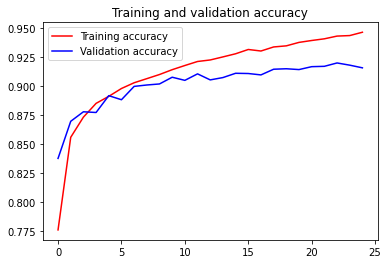

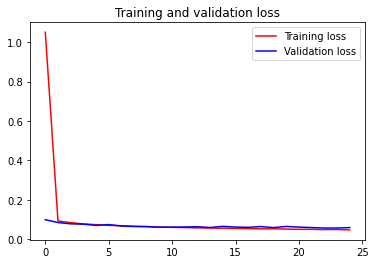

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune dropout rate

### 0.4

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.4))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 20736)             0         
                                                                 
 dense_10 (Dense)            (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 33ms/step - loss: 1.1274 - accuracy: 0.7905 - val_loss: 0.0892 - val_accuracy: 0.8470
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0872 - accuracy: 0.8599 - val_loss: 0.0783 - val_accuracy: 0.8722
Epoch 3/25
469/469 [==============================] - 16s 33ms/step - loss: 0.0798 - accuracy: 0.8773 - val_loss: 0.0779 - val_accuracy: 0.8830
Epoch 4/25
469/469 [==============================] - 16s 34ms/step - loss: 0.0752 - accuracy: 0.8864 - val_loss: 0.0732 - val_accuracy: 0.8883
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0715 - accuracy: 0.8942 - val_loss: 0.0712 - val_accuracy: 0.8889
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0689 - accuracy: 0.8986 - val_loss: 0.0693 - val_accuracy: 0.8902
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0667 - accuracy: 0.9039 - val_loss: 0.0701 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06083953380584717
Test accuracy: 0.9189000129699707


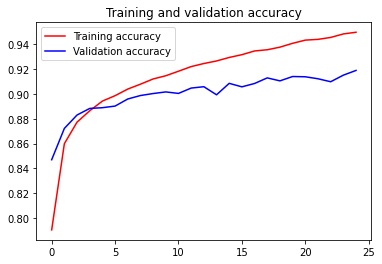

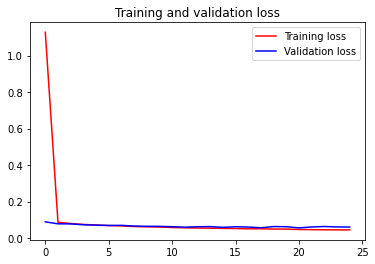

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.6

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.6))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 20736)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 17s 34ms/step - loss: 1.1202 - accuracy: 0.7744 - val_loss: 0.1011 - val_accuracy: 0.8427
Epoch 2/25
469/469 [==============================] - 15s 33ms/step - loss: 0.0983 - accuracy: 0.8497 - val_loss: 0.0867 - val_accuracy: 0.8637
Epoch 3/25
469/469 [==============================] - 16s 33ms/step - loss: 0.0899 - accuracy: 0.8684 - val_loss: 0.0810 - val_accuracy: 0.8794
Epoch 4/25
469/469 [==============================] - 15s 33ms/step - loss: 0.0850 - accuracy: 0.8767 - val_loss: 0.0772 - val_accuracy: 0.8801
Epoch 5/25
469/469 [==============================] - 15s 33ms/step - loss: 0.0805 - accuracy: 0.8869 - val_loss: 0.0756 - val_accuracy: 0.8844
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0766 - accuracy: 0.8916 - val_loss: 0.0713 - val_accuracy: 0.8898
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0735 - accuracy: 0.8978 - val_loss: 0.0721 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06252143532037735
Test accuracy: 0.914900004863739


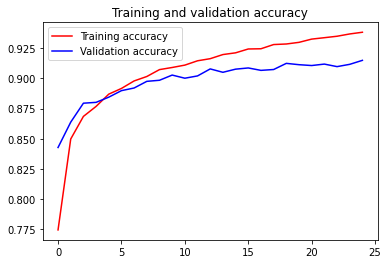

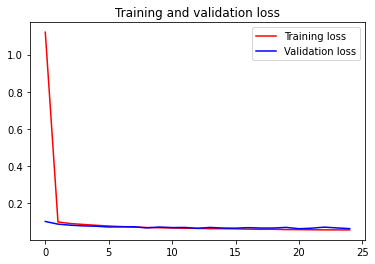

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.7

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.7))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 20736)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 33ms/step - loss: 1.0878 - accuracy: 0.7638 - val_loss: 0.1054 - val_accuracy: 0.8369
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1070 - accuracy: 0.8441 - val_loss: 0.0898 - val_accuracy: 0.8719
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0961 - accuracy: 0.8665 - val_loss: 0.0860 - val_accuracy: 0.8802
Epoch 4/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0899 - accuracy: 0.8796 - val_loss: 0.0798 - val_accuracy: 0.8853
Epoch 5/25
469/469 [==============================] - 15s 33ms/step - loss: 0.0845 - accuracy: 0.8874 - val_loss: 0.0788 - val_accuracy: 0.8907
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0805 - accuracy: 0.8950 - val_loss: 0.0747 - val_accuracy: 0.8942
Epoch 7/25
469/469 [==============================] - 15s 33ms/step - loss: 0.0770 - accuracy: 0.9003 - val_loss: 0.0765 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0685276985168457
Test accuracy: 0.9164999723434448


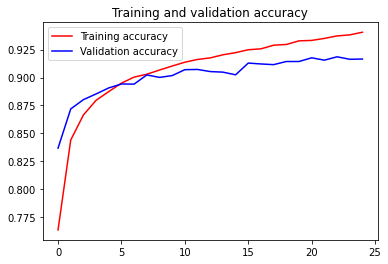

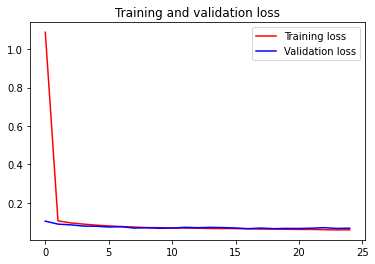

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune batch size

### 64

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=64,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
938/938 [==============================] - 23s 23ms/step - loss: 0.6018 - accuracy: 0.8004 - val_loss: 0.0952 - val_accuracy: 0.8535
Epoch 2/25
938/938 [==============================] - 21s 23ms/step - loss: 0.0964 - accuracy: 0.8643 - val_loss: 0.0899 - val_accuracy: 0.8755
Epoch 3/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0862 - accuracy: 0.8830 - val_loss: 0.0804 - val_accuracy: 0.8844
Epoch 4/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0801 - accuracy: 0.8929 - val_loss: 0.0854 - val_accuracy: 0.8815
Epoch 5/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0755 - accuracy: 0.8995 - val_loss: 0.0759 - val_accuracy: 0.8889
Epoch 6/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0722 - accuracy: 0.9071 - val_loss: 0.0726 - val_accuracy: 0.8944
Epoch 7/25
938/938 [==============================] - 21s 23ms/step - loss: 0.0697 - accuracy: 0.9099 - val_loss: 0.0667 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06789693981409073
Test accuracy: 0.9164000153541565


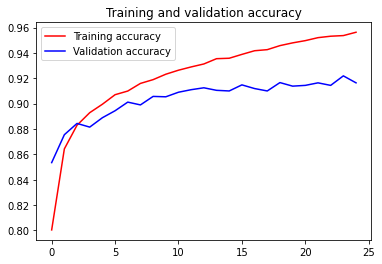

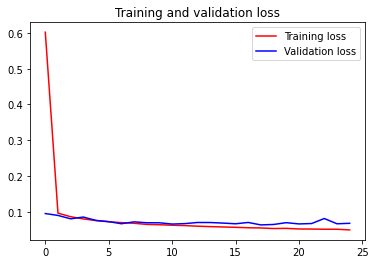

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 256

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=258,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
233/233 [==============================] - 15s 58ms/step - loss: 2.0826 - accuracy: 0.7456 - val_loss: 0.1076 - val_accuracy: 0.7987
Epoch 2/25
233/233 [==============================] - 13s 54ms/step - loss: 0.0978 - accuracy: 0.8315 - val_loss: 0.0893 - val_accuracy: 0.8442
Epoch 3/25
233/233 [==============================] - 12s 52ms/step - loss: 0.0858 - accuracy: 0.8586 - val_loss: 0.0795 - val_accuracy: 0.8615
Epoch 4/25
233/233 [==============================] - 12s 52ms/step - loss: 0.0796 - accuracy: 0.8699 - val_loss: 0.0781 - val_accuracy: 0.8735
Epoch 5/25
233/233 [==============================] - 12s 52ms/step - loss: 0.0757 - accuracy: 0.8790 - val_loss: 0.0756 - val_accuracy: 0.8741
Epoch 6/25
233/233 [==============================] - 12s 52ms/step - loss: 0.0729 - accuracy: 0.8847 - val_loss: 0.0739 - val_accuracy: 0.8779
Epoch 7/25
233/233 [==============================] - 13s 54ms/step - loss: 0.0707 - accuracy: 0.8894 - val_loss: 0.0719 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05578530207276344
Test accuracy: 0.910099983215332


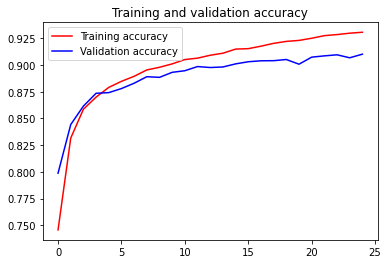

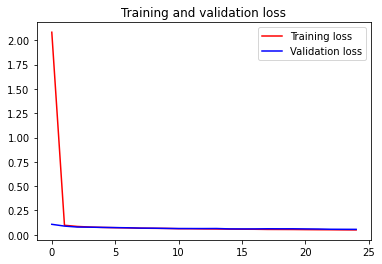

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune learning rate

### 2e-3

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=2e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 20736)             0         
                                                                 
 dense_24 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 17s 33ms/step - loss: 0.6655 - accuracy: 0.7739 - val_loss: 0.1048 - val_accuracy: 0.8460
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1064 - accuracy: 0.8529 - val_loss: 0.1010 - val_accuracy: 0.8587
Epoch 3/25
469/469 [==============================] - 16s 33ms/step - loss: 0.0990 - accuracy: 0.8706 - val_loss: 0.0883 - val_accuracy: 0.8768
Epoch 4/25
469/469 [==============================] - 16s 33ms/step - loss: 0.0898 - accuracy: 0.8823 - val_loss: 0.0855 - val_accuracy: 0.8828
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0870 - accuracy: 0.8911 - val_loss: 0.0911 - val_accuracy: 0.8873
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0840 - accuracy: 0.8961 - val_loss: 0.0849 - val_accuracy: 0.8858
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0823 - accuracy: 0.9015 - val_loss: 0.0874 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07903308421373367
Test accuracy: 0.9104999899864197


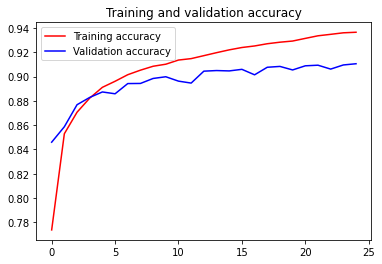

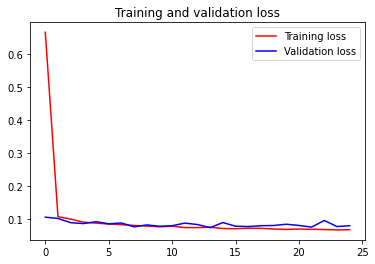

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 5e-3

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=5e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 20736)             0         
                                                                 
 dense_26 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 32ms/step - loss: 0.5591 - accuracy: 0.7395 - val_loss: 0.1372 - val_accuracy: 0.8202
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1305 - accuracy: 0.8400 - val_loss: 0.1226 - val_accuracy: 0.8548
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1275 - accuracy: 0.8630 - val_loss: 0.1202 - val_accuracy: 0.8615
Epoch 4/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1227 - accuracy: 0.8737 - val_loss: 0.1252 - val_accuracy: 0.8680
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1205 - accuracy: 0.8769 - val_loss: 0.1220 - val_accuracy: 0.8750
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1218 - accuracy: 0.8823 - val_loss: 0.1105 - val_accuracy: 0.8763
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1189 - accuracy: 0.8844 - val_loss: 0.1122 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0956040695309639
Test accuracy: 0.8988999724388123


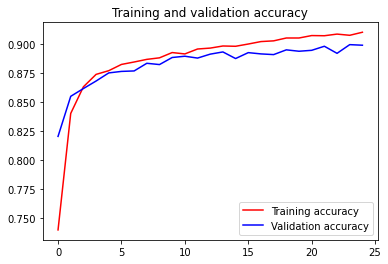

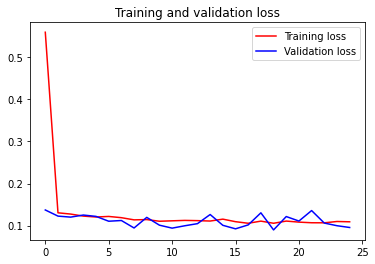

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 1e-2

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-2, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 20736)             0         
                                                                 
 dense_28 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 33ms/step - loss: 0.8325 - accuracy: 0.6730 - val_loss: 0.1515 - val_accuracy: 0.7823
Epoch 2/25
469/469 [==============================] - 15s 33ms/step - loss: 0.1467 - accuracy: 0.7860 - val_loss: 0.1278 - val_accuracy: 0.8125
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1462 - accuracy: 0.7842 - val_loss: 0.1335 - val_accuracy: 0.8194
Epoch 4/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1481 - accuracy: 0.7914 - val_loss: 0.1367 - val_accuracy: 0.8301
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1472 - accuracy: 0.7945 - val_loss: 0.1280 - val_accuracy: 0.8375
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1470 - accuracy: 0.7975 - val_loss: 0.1244 - val_accuracy: 0.8429
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.1490 - accuracy: 0.8032 - val_loss: 0.1289 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17326030135154724
Test accuracy: 0.8456000089645386


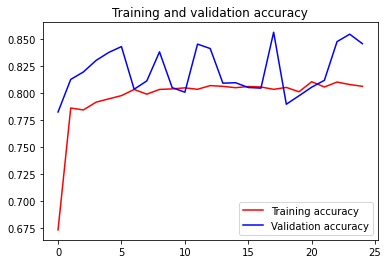

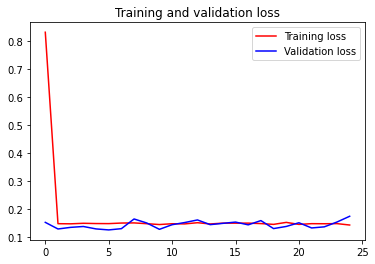

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune penalty parameter

### 0.5

In [ ]:
svm_c = 0.5
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 20736)             0         
                                                                 
 dense_32 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 33ms/step - loss: 0.6646 - accuracy: 0.7919 - val_loss: 0.0947 - val_accuracy: 0.8416
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0868 - accuracy: 0.8607 - val_loss: 0.0801 - val_accuracy: 0.8711
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0780 - accuracy: 0.8778 - val_loss: 0.0765 - val_accuracy: 0.8734
Epoch 4/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0728 - accuracy: 0.8872 - val_loss: 0.0701 - val_accuracy: 0.8882
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0682 - accuracy: 0.8961 - val_loss: 0.0668 - val_accuracy: 0.8941
Epoch 6/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0646 - accuracy: 0.9027 - val_loss: 0.0678 - val_accuracy: 0.8891
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0615 - accuracy: 0.9080 - val_loss: 0.0648 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05480238050222397
Test accuracy: 0.9190000295639038


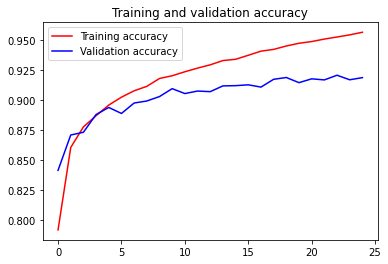

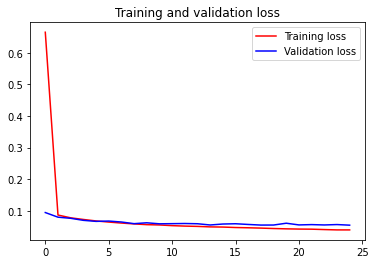

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.1

In [ ]:
svm_c = 0.1
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 20736)             0         
                                                                 
 dense_34 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 32ms/step - loss: 0.2716 - accuracy: 0.7980 - val_loss: 0.0849 - val_accuracy: 0.8508
Epoch 2/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0779 - accuracy: 0.8640 - val_loss: 0.0734 - val_accuracy: 0.8662
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0690 - accuracy: 0.8808 - val_loss: 0.0742 - val_accuracy: 0.8680
Epoch 4/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0632 - accuracy: 0.8913 - val_loss: 0.0703 - val_accuracy: 0.8777
Epoch 5/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0595 - accuracy: 0.8999 - val_loss: 0.0636 - val_accuracy: 0.8889
Epoch 6/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0561 - accuracy: 0.9060 - val_loss: 0.0579 - val_accuracy: 0.8999
Epoch 7/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0538 - accuracy: 0.9114 - val_loss: 0.0562 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05165969952940941
Test accuracy: 0.9171000123023987


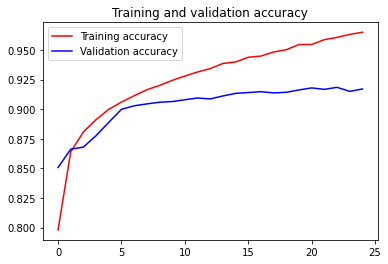

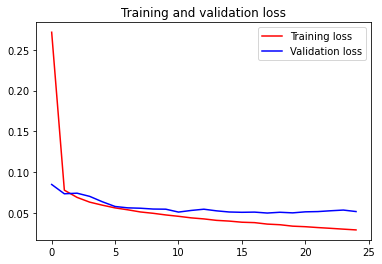

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.01

In [ ]:
svm_c = 0.01
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 20736)             0         
                                                                 
 dense_36 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 16s 32ms/step - loss: 0.1606 - accuracy: 0.8186 - val_loss: 0.0798 - val_accuracy: 0.8553
Epoch 2/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0695 - accuracy: 0.8720 - val_loss: 0.0671 - val_accuracy: 0.8711
Epoch 3/25
469/469 [==============================] - 15s 32ms/step - loss: 0.0614 - accuracy: 0.8865 - val_loss: 0.0614 - val_accuracy: 0.8838
Epoch 4/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0567 - accuracy: 0.8956 - val_loss: 0.0577 - val_accuracy: 0.8897
Epoch 5/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0527 - accuracy: 0.9040 - val_loss: 0.0565 - val_accuracy: 0.8910
Epoch 6/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0502 - accuracy: 0.9097 - val_loss: 0.0520 - val_accuracy: 0.8985
Epoch 7/25
469/469 [==============================] - 15s 31ms/step - loss: 0.0476 - accuracy: 0.9153 - val_loss: 0.0530 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04991772025823593
Test accuracy: 0.914900004863739


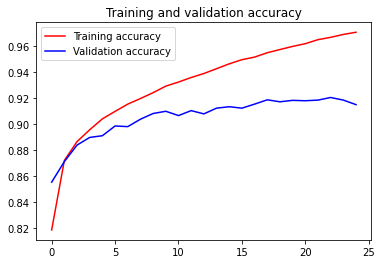

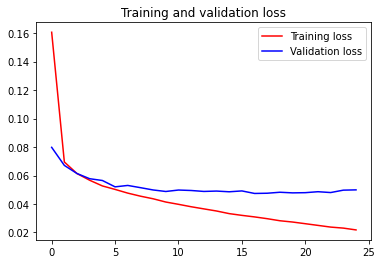

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Model with Data Augmentattion

In [ ]:
# datagen = ImageDataGenerator(
#         rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
#         width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
#         vertical_flip=True)  # randomly flip images

# datagen.fit(x_train_cnn)

In [ ]:
# # Model
# cnn3 = Sequential()
# cnn3.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

# cnn3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# cnn3.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

# cnn3.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

# cnn3.add(Flatten())
# cnn3.add(Dense(1024, activation='relu'))

# cnn3.add(Dropout(rate=0.5))

# cnn3.add(Dense(10, activation='softmax'))

In [ ]:
# opt = Adam(lr= 1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# cnn3.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# history = cnn3.fit(x_train_norm, y_train_cnn,
#                   batch_size=128,
#                   epochs=25,
#                   validation_data=(x_test_norm, y_test_cnn))

In [ ]:
# score = cnn3.evaluate(x_test_norm, y_test_cnn, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(accuracy))

# plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()
